In [5]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

import pandas as pd

In [6]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
X = cancer.data[:,:2]
y = cancer.target

In [8]:
df = pd.DataFrame(X)
df['Target'] = y
df

,0,1,Target
0,17.99,10.38,0
1,20.57,17.77,0
2,19.69,21.25,0
3,11.42,20.38,0
4,20.29,14.34,0
...,...,...,...
564,21.56,22.39,0
565,20.13,28.25,0
566,16.60,28.08,0
567,20.60,29.33,0


In [9]:
df.groupby('Target').count()

,0,1
Target,,
0,212,212
1,357,357


In [10]:
svm = SVC(kernel='linear', C=1)

In [11]:
svm.fit(X, y)

SVC(C=1, kernel='linear')

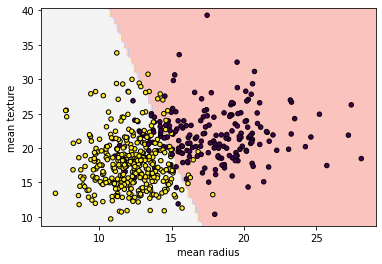

In [12]:
DecisionBoundaryDisplay.from_estimator(
    svm,
    X,
    response_method='predict',
    alpha=0.8,
    cmap='Pastel1',
    xlabel=cancer.feature_names[0],
    ylabel=cancer.feature_names[1]
)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
plt.show()